# Team Challenge Image Analysis - Team 6

This notebook shows an example workflow for the proposed image analysis software, it consists of two parts: training and evaluation. More information about the setup and file structure can be found on the Github page.

## Part 0: Setup
In this part, the general setup for the workflow will be done. This consists of changing the working directory to be `root` and performing relevant imports. 

In [1]:
# Change working directory to the root folder
import os, sys
if os.path.split(os.getcwd())[-1] != 'TeamChallenge_team6':
    %cd ..
    
    if os.path.split(os.getcwd())[-1] != 'TeamChallenge_team6':
        raise UserError("Something went wrong in the directory reassignment!")

# Add relevant directories to path
if "" not in sys.path : sys.path.append("")
if "src" not in sys.path : sys.path.append("src")

/home/sjors/Documents/TUe/MSc/TeamChallenge/TeamChallenge_team6


In [2]:
# Relevant imports
import os
from data_preperation import data_prep, inspect_data
from preprocessing import preprocess_data
from model import define_discriminator, define_generator, define_gan
from training import train
# from evaluation import evaluate, get_fnirt_DSC, resp_vec_correlation
from util.tf_session import setup_tf_session
from util.general import *

# Setup the tf session for possible gpu usage
n_gpus = setup_tf_session()

## Part 1: Training
In this part, the cGAN model will be trained. It will do so by first preprocessing the data, after which the datasets will be loaded and the models are defined. Hereafter, the actual training process is performed. By default, we'll be training for 100 epochs with a batch size of 4 and an augmentation factor of 20. 

### 1a: Data preprocessing

In [3]:
preprocess_data("data", verbose=True)

100%|##########| 22/22 [00:00<00:00, 873.15it/s]

Performing data preprocessing in directory:
/home/sjors/Documents/TUe/MSc/TeamChallenge/TeamChallenge_team6/data


### 1b: Dataset generation

##### Data loading

In [4]:
# Load data
print("Dataset - TRAIN")
dataset_train, train_subjects = data_prep(os.path.join("data", "preprocessed"), True, "train", verbose=True)
print("Dataset - TEST")
dataset_test, test_subjects = data_prep(os.path.join("data", "preprocessed"), True, "test", verbose=True)

# Define image shape
image_shape = dataset_train[0].shape[1:]
image_shape = (image_shape[0], image_shape[1], 1)

Dataset - TRAIN
Extracting data for subject 'rat72' (1/16)...	Completed
Extracting data for subject 'rat26' (2/16)...	Completed
Extracting data for subject 'rat34' (3/16)...	Completed
Extracting data for subject 'rat89' (4/16)...	Completed
Extracting data for subject 'rat71' (5/16)...	Completed
Extracting data for subject 'rat25' (6/16)...	Completed
Extracting data for subject 'rat62' (7/16)...	Completed
Extracting data for subject 'rat19' (8/16)...	Completed
Extracting data for subject 'rat63' (9/16)...	Completed
Extracting data for subject 'rat35' (10/16)...	Completed
Extracting data for subject 'rat24' (11/16)...	Completed
Extracting data for subject 'rat69' (12/16)...	Completed
Extracting data for subject 'rat96' (13/16)...	Completed
Extracting data for subject 'rat70' (14/16)...	Completed
Extracting data for subject 'rat20' (15/16)...	Completed
Extracting data for subject 'rat31' (16/16)...	Completed

Completed data extraction!
Found a total of 48 slices

Dataset - TEST
Extracting

##### Data inspection
We will now also have a look at some of the preprocessed images for quality assurance and a better understanding in the inner workings of the pipeline. Please note that here, the left image is the day 3 image (input), while the right image is the day 0 image (target). You'll notice that the image used are brain extracted and cropped in such a way as to center the brain as much as possible. Also, a histogram equalization is performed to yield better image contrast.

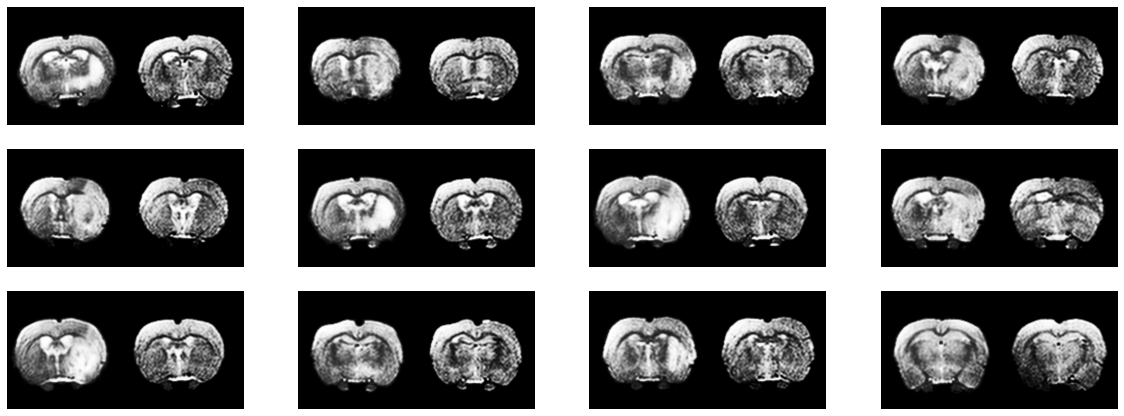

In [5]:
inspect_data(dataset_train, n_samples = 12)

### 1c: Model definition

In [6]:
# TODO: We should add Roos's schematic here!

# Define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)

gan_model = define_gan(g_model, d_model, image_shape)

# Show model summaries
print(print_style.BOLD+"=== DISCRIMINATOR MODEL ==="+print_style.END)
d_model.summary()
print(print_style.BOLD+"\n\n===== GENERATOR MODEL ====="+print_style.END)
g_model.summary()
print(print_style.BOLD+"\n\n======== GAN MODEL ========"+print_style.END)
gan_model.summary()

=== DISCRIMINATOR MODEL ===
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256, 256, 2)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 2112        c

### 1d: Actual training

In [ ]:
# Train model
run_name = train(d_model, g_model, gan_model, dataset_train, n_epochs=100, n_batch=4)

## Part 2: Evaluation

Based on the training we did above, we can evaluate the best performing model. First choose which model (based on step) you want to evaluate (e.g. "0029400"), you can do this by typing the following into your prompt (with specified path to logs): 

tensorboard --logdir "../logs" 

and go to http://localhost:6006/

The step which resulted in the best performing step can be specified in the specific_model parameter below to evaluate the correpsonding model ("last" argument results in evaluating the model from the last step).

In [ ]:
eval_SSIMs = evaluate(d_model, g_model, gan_model, dataset_test, run_name, specific_model="0000003")
eval_DSCs = get_fnirt_DSC("data", test_subjects)
resp_vec_cor = resp_vec_correlation("data", test_subjects, eval_SSIMs)

In [ ]:
# TODO:
# correlatie dingen